# Classifiez automatiquement des informations

## Analyse exploratoire des fichiers de données

### Chargement des jeu de donnée

In [1]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
from typing import List, Union, Dict

# Custom imports
import data_utils as du
import preprocessing as pp
import graph as gr

In [2]:
df_eval, df_sirh, df_sondage = pp.charger_donnees('data/extrait_eval.csv', 'data/extrait_sirh.csv', 'data/extrait_sondage.csv')

📁 Chargement des données...
   ✓ Évaluations: (1470, 10)
   ✓ SIRH: (1470, 12)
   ✓ Sondage: (1470, 12)


### Analyse des jeux de données

#### SIRH

In [3]:
du.explore_dataframe(df_sirh, False)


📋 Informations générales:
  • Nombre de lignes: 1470
  • Nombre de colonnes: 12
  • Taille mémoire: 449.26 KB

--- HEAD ---


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2



--- INFO ---
<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   id_employee                     1470 non-null   int64
 1   age                             1470 non-null   int64
 2   genre                           1470 non-null   str  
 3   revenu_mensuel                  1470 non-null   int64
 4   statut_marital                  1470 non-null   str  
 5   departement                     1470 non-null   str  
 6   poste                           1470 non-null   str  
 7   nombre_experiences_precedentes  1470 non-null   int64
 8   nombre_heures_travailless       1470 non-null   int64
 9   annee_experience_totale         1470 non-null   int64
 10  annees_dans_l_entreprise        1470 non-null   int64
 11  annees_dans_le_poste_actuel     1470 non-null   int64
dtypes: int64(8), str(4)
memory usage: 137.9 KB

--- DESCRIBE --

,id_employee,age,revenu_mensuel,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,6502.931293,2.693197,80.0,11.279592,7.008163,4.229252
std,602.024335,9.135373,4707.956783,2.498009,0.0,7.780782,6.126525,3.623137
min,1.000000,18.000000,1009.000000,0.000000,80.0,0.000000,0.000000,0.000000
25%,491.250000,30.000000,2911.000000,1.000000,80.0,6.000000,3.000000,2.000000
50%,1020.500000,36.000000,4919.000000,2.000000,80.0,10.000000,5.000000,3.000000
75%,1555.750000,43.000000,8379.000000,4.000000,80.0,15.000000,9.000000,7.000000
max,2068.000000,60.000000,19999.000000,9.000000,80.0,40.000000,40.000000,18.000000



--- MISSING VALUES ---

🌐 Pourcentage de cellules vides sur tout le DataFrame : 0.00%

📊 VARIABLES QUANTITATIVES (6):
  • id_employee                                        | Type: int64      | Valeurs uniques:  1470 | Quantitative continue
  • age                                                | Type: int64      | Valeurs uniques:    43 | Quantitative continue
  • revenu_mensuel                                     | Type: int64      | Valeurs uniques:  1349 | Quantitative continue
  • annee_experience_totale                            | Type: int64      | Valeurs uniques:    40 | Quantitative continue
  • annees_dans_l_entreprise                           | Type: int64      | Valeurs uniques:    37 | Quantitative continue
  • annees_dans_le_poste_actuel                        | Type: int64      | Valeurs uniques:    19 | Quantitative continue

📝 VARIABLES QUALITATIVES (6):
  • genre                                              | Type: str        | Valeurs uniques:     2 | Qualitative

####  Analyse des données SIRH

**Aucune donnée manquante détectée**

**Variables (Features)**
``
- `id_employee` : Identifiant unique de l’employé  
  - Variable technique (à exclure des modèles prédictifs)
  - Peut-être utile pour la jointure

- `age` : Âge de l’employé  
  - Variable numérique continue

- `genre` : Sexe de l’employé  
  - Variable catégorielle binaire (F/M)  
  - À encoder (ex. encodage binaire)

- `revenu_mensuel` : Salaire mensuel  
  - Forte dispersion des valeurs  
  - Minimum : 1 009, Maximum : 19 999  
  - À analyser (outliers, normalisation éventuelle)

- `statut_marital` : Situation familiale  
  - Variable catégorielle  
  - À vérifier pour l’encodage

- `departement` : Département / division de l’entreprise  
  - Variable catégorielle  
  - À encoder

- `poste` : Intitulé du poste occupé  
  - Variable catégorielle  
  - Forte cardinalité possible → à surveiller pour l’encodage

- `nombre_experiences_precedentes` : Nombre d’entreprises dans lesquelles l’employé a travaillé auparavant  
  - Variable numérique discrète

- `nombre_heures_travaillees` : Nombre d’heures travaillées  
  - Valeur identique pour tous les employés (80)  
  - Variable non informative → à supprimer

- `annee_experience_totale` : Nombre total d’années d’expérience professionnelle  
  - Variable numérique continue

- `annees_dans_l_entreprise` : Ancienneté dans l’entreprise actuelle  
  - Variable numérique continue

- `annees_dans_le_poste_actuel` : Ancienneté dans le poste actuel  
  - Variable numérique continue


#### Eval

In [4]:
du.explore_dataframe(df_eval, False)


📋 Informations générales:
  • Nombre de lignes: 1470
  • Nombre de colonnes: 10
  • Taille mémoire: 309.43 KB

--- HEAD ---


,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %
3,4,3,1,3,3,3,E_5,3,Oui,11 %
4,1,3,1,2,4,3,E_7,3,Non,12 %



--- INFO ---
<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   satisfaction_employee_environnement        1470 non-null   int64
 1   note_evaluation_precedente                 1470 non-null   int64
 2   niveau_hierarchique_poste                  1470 non-null   int64
 3   satisfaction_employee_nature_travail       1470 non-null   int64
 4   satisfaction_employee_equipe               1470 non-null   int64
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64
 6   eval_number                                1470 non-null   str  
 7   note_evaluation_actuelle                   1470 non-null   int64
 8   heure_supplementaires                      1470 non-null   str  
 9   augementation_salaire_precedente           1470 non-null   str  
dtypes: int64(7), str(3)
memory usage: 115.0 KB

-

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.721769,2.729932,2.063946,2.728571,2.712245,2.761224,3.153741
std,1.093082,0.711561,1.106940,1.102846,1.081209,0.706476,0.360824
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000
max,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000



--- MISSING VALUES ---

🌐 Pourcentage de cellules vides sur tout le DataFrame : 0.00%

📊 VARIABLES QUANTITATIVES (0):

📝 VARIABLES QUALITATIVES (10):
  • satisfaction_employee_environnement                | Type: int64      | Valeurs uniques:     4 | Catégorielle (encodée numériquement)
  • note_evaluation_precedente                         | Type: int64      | Valeurs uniques:     4 | Catégorielle (encodée numériquement)
  • niveau_hierarchique_poste                          | Type: int64      | Valeurs uniques:     5 | Catégorielle (encodée numériquement)
  • satisfaction_employee_nature_travail               | Type: int64      | Valeurs uniques:     4 | Catégorielle (encodée numériquement)
  • satisfaction_employee_equipe                       | Type: int64      | Valeurs uniques:     4 | Catégorielle (encodée numériquement)
  • satisfaction_employee_equilibre_pro_perso          | Type: int64      | Valeurs uniques:     4 | Catégorielle (encodée numériquement)
  • eval_number      

#### Analyse des données EVAL

- Aucune donnée manquante détectée  
- Aucune donnée aberrante apparente

**Variables (Features)**

- `eval_number` : Identifiant unique de l’évaluation  
  - Format : `E_X` où `X` est un nombre  
  - Variable technique (à exclure des modèles prédictifs)
  - Semble être la variable unique

- `satisfaction_employee_environnement` : Niveau de satisfaction de l’employé concernant son environnement de travail  
  - Variable numérique ordinale  
  - À vérifier (échelle de type Likert)

- `satisfaction_employee_nature_travail` : Niveau de satisfaction concernant la nature et le contenu du travail  
  - Variable numérique ordinale

- `satisfaction_employee_equipe` : Niveau de satisfaction concernant l’équipe et les collègues  
  - Variable numérique ordinale

- `satisfaction_employee_equilibre_pro_perso` : Niveau de satisfaction concernant l’équilibre vie professionnelle / vie personnelle  
  - Variable numérique ordinale

- `note_evaluation_precedente` : Note obtenue lors de l’évaluation annuelle précédente  
  - Variable numérique  
  - À analyser en lien avec la performance actuelle

- `note_evaluation_actuelle` : Note obtenue lors de l’évaluation annuelle actuelle  
  - Variable numérique  
  - Variable cible potentielle selon l’objectif de l’analyse

- `niveau_hierarchique_poste` : Niveau hiérarchique du poste occupé  
  - Variable numérique ordinale  
  - À vérifier (ordre et distribution des niveaux)

- `heure_supplementaires` : Indique si l’employé effectue des heures supplémentaires  
  - Variable catégorielle binaire (Oui/Non)  
  - À encoder

- `augmentation_salaire_precedente` : Pourcentage d’augmentation salariale lors du dernier cycle  
  - Variable numérique continue  
  - À analyser (dispersion, valeurs extrêmes éventuelles)


In [5]:
du.explore_dataframe(df_sondage, False)


📋 Informations générales:
  • Nombre de lignes: 1470
  • Nombre de colonnes: 12
  • Taille mémoire: 415.56 KB

--- HEAD ---


,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2



--- INFO ---
<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   a_quitte_l_entreprise                1470 non-null   str  
 1   nombre_participation_pee             1470 non-null   int64
 2   nb_formations_suivies                1470 non-null   int64
 3   nombre_employee_sous_responsabilite  1470 non-null   int64
 4   code_sondage                         1470 non-null   int64
 5   distance_domicile_travail            1470 non-null   int64
 6   niveau_education                     1470 non-null   int64
 7   domaine_etude                        1470 non-null   str  
 8   ayant_enfants                        1470 non-null   str  
 9   frequence_deplacement                1470 non-null   str  
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64
 11  annes_sous_responsable_actuel        1470 non-null   

,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
count,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.793878,2.799320,1.0,1024.865306,9.192517,2.912925,2.187755,4.123129
std,0.852077,1.289271,0.0,602.024335,8.106864,1.024165,3.222430,3.568136
min,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.0,491.250000,2.000000,2.000000,0.000000,2.000000
50%,1.000000,3.000000,1.0,1020.500000,7.000000,3.000000,1.000000,3.000000
75%,1.000000,3.000000,1.0,1555.750000,14.000000,4.000000,3.000000,7.000000
max,3.000000,6.000000,1.0,2068.000000,29.000000,5.000000,15.000000,17.000000



--- MISSING VALUES ---

🌐 Pourcentage de cellules vides sur tout le DataFrame : 0.00%

📊 VARIABLES QUANTITATIVES (4):
  • code_sondage                                       | Type: int64      | Valeurs uniques:  1470 | Quantitative continue
  • distance_domicile_travail                          | Type: int64      | Valeurs uniques:    29 | Quantitative continue
  • annees_depuis_la_derniere_promotion                | Type: int64      | Valeurs uniques:    16 | Quantitative continue
  • annes_sous_responsable_actuel                      | Type: int64      | Valeurs uniques:    18 | Quantitative continue

📝 VARIABLES QUALITATIVES (8):
  • a_quitte_l_entreprise                              | Type: str        | Valeurs uniques:     2 | Qualitative
  • nombre_participation_pee                           | Type: int64      | Valeurs uniques:     4 | Catégorielle (encodée numériquement)
  • nb_formations_suivies                              | Type: int64      | Valeurs uniques:     7 | Catégo


Aucune donnée manquante
Ne semble pas avoir de donnée abérrante

**Features**

- a_quitte_l_entreprise:  L'employé a-t-il quitté l'entreprise ? 
    - C'est notre variable cible
- nombre_participation_pee: Nombre de participations au Plan d'Épargne Entreprise
- nb_formations_suivies: Nombre de formations suivies dans l'année
- nombre_employee_sous_responsabilite: Nombre d'employés sous la responsabilité directe
- code_sondage : Identifiant unique du sondage
- distance_domicile_travail : Distance en kilomètres entre domicile et lieu de travail
- niveau_education: Niveau d'études atteint
- domaine_etude: Domaine d'études/spécialisation
- ayant_enfants: L'employé a-t-il des enfants ?
- frequence_deplacement: Fréquence des déplacements professionnels
- annees_depuis_la_derniere_promotion: Nombre d'années écoulées depuis la dernière promotion
- annes_sous_responsable_actuel: Nombre d'années sous le management du responsable actuel


### Varibale cibles

Notre variable cible sera : `a_quitte_l_entreprise`

In [6]:
TARGET = 'a_quitte_l_entreprise'


📊 Distribution de la colonne 'a_quitte_l_entreprise'
----------------------------------------------------------------------------------------------------


,Effectif,Pourcentage
a_quitte_l_entreprise,,
Non,1233,83.88
Oui,237,16.12


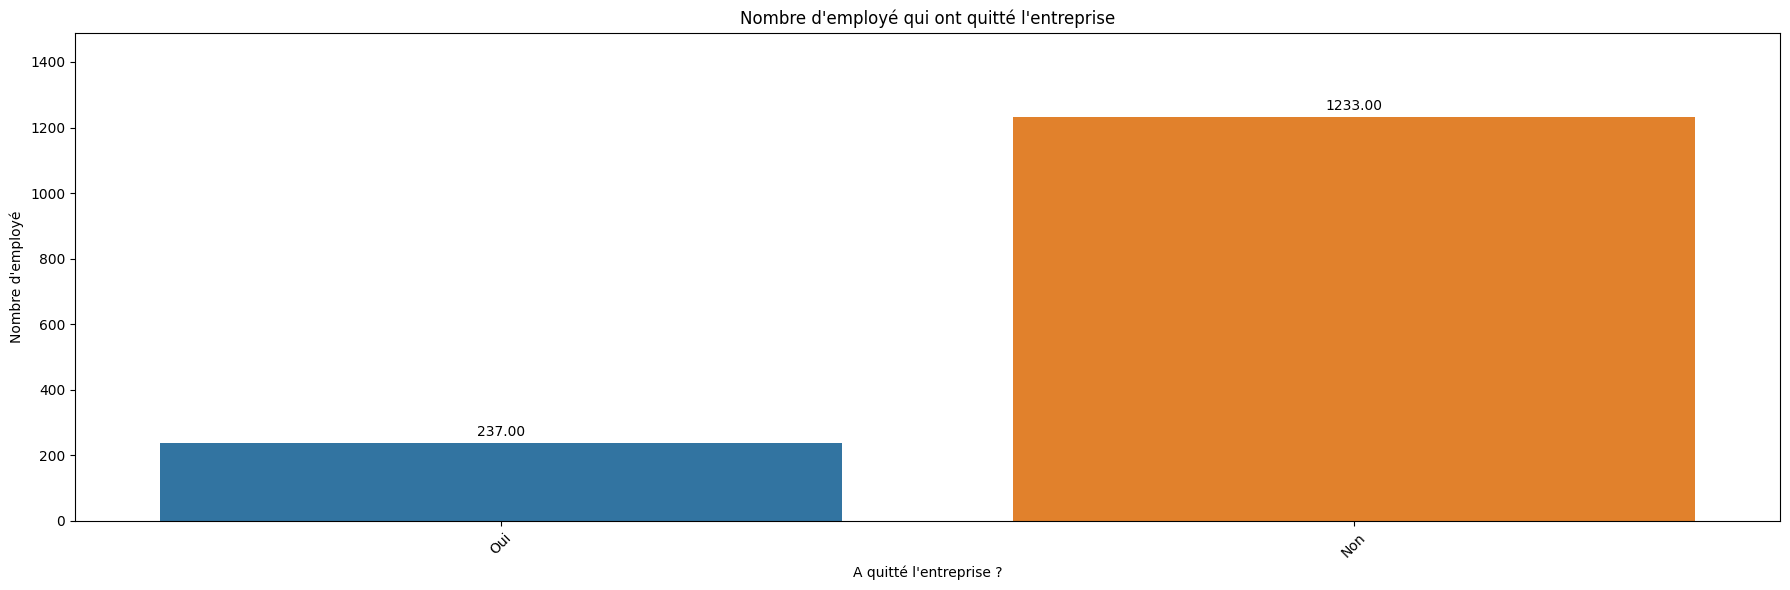

In [7]:
du.distribution_column(df_sondage, TARGET)

fig, axes = plt.subplots(1, 1, figsize=(18, 6))
gr.create_barplot(
	df_sondage,
    axes,
    TARGET,
    title="Nombre d'employé qui ont quitté l'entreprise",
    xlabel="A quitté l'entreprise ?",
    ylabel="Nombre d'employé"
)
plt.tight_layout()
plt.show()


On constate que 16% des salariés qui ont intégré l'entreprise sont partis.

### Nettoyage des fichiers

#### Nettoyage du fichier SIRH

In [8]:
du.display_single_column_info(df_sirh, 'genre', True)

┌─ genre
│
│  🔤 Type: str
│  🎯 Uniques: 2 (0.1%)
│  ✅ Manquantes: 0 (0.0%)
│  📋 Valeurs: F, M
│


,Effectif,Pourcentage
genre,,
M,882,60.0
F,588,40.0


└──────────────────────────────────────────────────────────────────────────────



La colonne **genre** est une variable catégorielle binaire (`F` / `M`).
On constate que l'entreprise a employé davantage d'hommes que de femmes.
Aucun nettoyage a appliqué.

In [9]:
du.display_single_column_info(df_sirh,'statut_marital', True)

┌─ statut_marital
│
│  🔤 Type: str
│  🎯 Uniques: 3 (0.2%)
│  ✅ Manquantes: 0 (0.0%)
│  📋 Valeurs: Célibataire, Marié(e), Divorcé(e)
│


,Effectif,Pourcentage
statut_marital,,
Marié(e),673,45.78
Célibataire,470,31.97
Divorcé(e),327,22.24


└──────────────────────────────────────────────────────────────────────────────



La colonne **statut_marital** est une variable catégorielle (`Célibataire`, `Divorcé(e)`, `Marié(e)`).
On constate que l'entreprise a employé davantage de personne mariés.
Aucun nettoyage a appliqué.

In [10]:
du.display_single_column_info(df_sirh,'departement', True)

┌─ departement
│
│  🔤 Type: str
│  🎯 Uniques: 3 (0.2%)
│  ✅ Manquantes: 0 (0.0%)
│  📋 Valeurs: Commercial, Consulting, Ressources Humaines
│


,Effectif,Pourcentage
departement,,
Consulting,961,65.37
Commercial,446,30.34
Ressources Humaines,63,4.29


└──────────────────────────────────────────────────────────────────────────────



La colonne **departement** est une variable catégorielle contenant 3 valeurs (`Consulting`, `Commercial`, `Ressources Humaines`).
Aucun nettoyage a appliqué.

In [11]:
du.display_single_column_info(df_sirh,'poste', True)

┌─ poste
│
│  🔤 Type: str
│  🎯 Uniques: 9 (0.6%)
│  ✅ Manquantes: 0 (0.0%)
│  📋 Valeurs: Cadre Commercial, Assistant de Direction, Consultant, Tech L...
│


,Effectif,Pourcentage
poste,,
Cadre Commercial,326,22.18
Assistant de Direction,292,19.86
Consultant,259,17.62
Tech Lead,145,9.86
Manager,131,8.91
Senior Manager,102,6.94
Représentant Commercial,83,5.65
Directeur Technique,80,5.44
Ressources Humaines,52,3.54


└──────────────────────────────────────────────────────────────────────────────



La colonne **poste** est une variable catégorielle contenant 9 valeurs uniques.
Aucun nettoyage a appliqué.

In [12]:
du.display_single_column_info(df_sirh,'nombre_heures_travailless')

┌─ nombre_heures_travailless
│
│  🔢 Type: int64
│  🎯 Uniques: 1 (0.1%)
│  ✅ Manquantes: 0 (0.0%)
│  📋 Valeurs: 80
└──────────────────────────────────────────────────────────────────────────────



La colonne **nombre_heures_travaillées** ne contient qu’une seule valeur unique ; elle n’apporte donc aucune information prédictive et sera donc supprimée.

In [13]:
df_sirh_clean = pp.clean_sirh_data(df_sirh)


🧹 Nettoyage du fichier SIRH...
🗂️ Suppression de colonnes | shape initiale : (1470, 12)
✅ 1 colonne supprimée | 0 inexistante | shape finale : (1470, 11)
   ✓ Nettoyage terminé. Nouvelles dimensions: (1470, 11)


#### Nettoyage du fichier EVAL

In [14]:
du.display_single_column_info(df_eval, 'eval_number')


┌─ eval_number
│
│  🔤 Type: str
│  🎯 Uniques: 1,470 (100.0%)
│  ✅ Manquantes: 0 (0.0%)
└──────────────────────────────────────────────────────────────────────────────



La colonne **eval_number** semble être un identifiant unique pour chaque employé, formaté comme `E_X` où `X` est l'ID numérique de l'employé.
Pour cela nous allons la nettoyer  afin d'extraire l'ID numérique et la faire correspondre avec la colonne **id_employee** du fichier SIRH.

In [15]:
du.display_single_column_info(df_eval, 'augementation_salaire_precedente')


┌─ augementation_salaire_precedente
│
│  🔤 Type: str
│  🎯 Uniques: 15 (1.0%)
│  ✅ Manquantes: 0 (0.0%)
└──────────────────────────────────────────────────────────────────────────────



La colonne **augementation_salaire_precedente** contient des pourcentages sous forme de chaînes de caractères (ex: `5 %`). Il faut les convertir en valeurs numériques.

In [29]:
du.display_single_column_info(df_eval, 'note_evaluation_actuelle')
du.distribution_column(df_eval, 'note_evaluation_actuelle')
du.distribution_column(df_eval, 'note_evaluation_precedente')


┌─ note_evaluation_actuelle
│
│  🔢 Type: int64
│  🎯 Uniques: 2 (0.1%)
│  ✅ Manquantes: 0 (0.0%)
│  📋 Valeurs: 3, 4
└──────────────────────────────────────────────────────────────────────────────


📊 Distribution de la colonne 'note_evaluation_actuelle'
----------------------------------------------------------------------------------------------------


,Effectif,Pourcentage
note_evaluation_actuelle,,
3,1244,84.63
4,226,15.37



📊 Distribution de la colonne 'note_evaluation_precedente'
----------------------------------------------------------------------------------------------------


,Effectif,Pourcentage
note_evaluation_precedente,,
3,868,59.05
2,375,25.51
4,144,9.80
1,83,5.65


La colonne **note_evaluation_actuelle** présente une variabilité très limitée, ce qui soulève un doute légitime quant à sa capacité prédictive. 

Cette distribution peut s’expliquer par un biais de sélection (départ des salariés faiblement notés), un effet de normalisation des évaluations ou une amélioration globale des performances.

Une analyse croisée avec la variable cible ainsi qu’une étude de l’évolution des notes individuelles sont nécessaires avant de statuer sur son caractère informatif. À défaut, cette variable pourra être écartée ou transformée en indicateur d’évolution

In [17]:
df_eval_clean = pp.clean_eval_data(df_eval)


🧹 Nettoyage du fichier des évaluations...
🗂️ Suppression de colonnes | shape initiale : (1470, 11)
✅ 1 colonne supprimée | 0 inexistante | shape finale : (1470, 10)
   ✓ Nettoyage terminé. Nouvelles dimensions: (1470, 10)


#### Nettoyage du fichier Sondage

In [18]:
du.display_single_column_info(df_sondage, 'code_sondage')


┌─ code_sondage
│
│  🔢 Type: int64
│  🎯 Uniques: 1,470 (100.0%)
│  ✅ Manquantes: 0 (0.0%)
│  📈 Min: 1.00 | Max: 2068.00 | Moyenne: 1024.87
└──────────────────────────────────────────────────────────────────────────────



la colonne **code_sondage** à 100% de valeur unique et  l'identifier unique permettant la jointure avec le sirh

In [19]:
du.display_single_column_info(df_sondage, 'nombre_employee_sous_responsabilite')


┌─ nombre_employee_sous_responsabilite
│
│  🔢 Type: int64
│  🎯 Uniques: 1 (0.1%)
│  ✅ Manquantes: 0 (0.0%)
│  📋 Valeurs: 1
└──────────────────────────────────────────────────────────────────────────────



La colonne **nombre_employee_sous_responsabilite** ne contient qu’une seule valeur unique ; elle n’apporte donc aucune information prédictive et sera donc supprimée.

In [20]:
du.display_single_column_info(df_sondage, 'ayant_enfants', True)


┌─ ayant_enfants
│
│  🔤 Type: str
│  🎯 Uniques: 1 (0.1%)
│  ✅ Manquantes: 0 (0.0%)
│  📋 Valeurs: Y
│


,Effectif,Pourcentage
ayant_enfants,,
Y,1470,100.0


└──────────────────────────────────────────────────────────────────────────────



La colonne **ayant_enfants** ne contient qu’une seule valeur unique ; Cela signifie qu'actuellement tous les personnes qui sont ou ont été employer on des enfants. elle n’apporte donc aucune information prédictive et sera donc supprimée.

In [21]:
df_sondage_clean = pp.clean_sondage_data(df_sondage)


🧹 Nettoyage du fichier des sondages...
🗂️ Suppression de colonnes | shape initiale : (1470, 12)
⚠️ Colonnes inexistantes (ignorées) : ['ayant_enfants ']
✅ 1 colonne supprimée | 1 inexistante | shape finale : (1470, 11)
   ✓ Nettoyage terminé. Nouvelles dimensions: (1470, 11)


### Jointure

Afin de pouvoir traiter les données pour la modélisation il faut réunir toutes ces données dans un seul dataframe. Chaque jeu de donnée possède une colonne avec une valeur uniques

- id_employee pour extraint_sirh
- eval_number pour extraint_eval
- code_sondage pour extraint_sondage

Vérifions si il ya un possible lien entre ces identifants

In [22]:
du.display_single_column_info(df_sirh_clean, 'id_employee')
du.display_single_column_info(df_eval_clean, 'employee_id_extracted')
du.display_single_column_info(df_sondage_clean, 'code_sondage')

┌─ id_employee
│
│  🔢 Type: int64
│  🎯 Uniques: 1,470 (100.0%)
│  ✅ Manquantes: 0 (0.0%)
│  📈 Min: 1.00 | Max: 2068.00 | Moyenne: 1024.87
└──────────────────────────────────────────────────────────────────────────────

┌─ employee_id_extracted
│
│  🔢 Type: int64
│  🎯 Uniques: 1,470 (100.0%)
│  ✅ Manquantes: 0 (0.0%)
│  📈 Min: 1.00 | Max: 2068.00 | Moyenne: 1024.87
└──────────────────────────────────────────────────────────────────────────────

┌─ code_sondage
│
│  🔢 Type: int64
│  🎯 Uniques: 1,470 (100.0%)
│  ✅ Manquantes: 0 (0.0%)
│  📈 Min: 1.00 | Max: 2068.00 | Moyenne: 1024.87
└──────────────────────────────────────────────────────────────────────────────



In [23]:
common_ids = set(df_eval_clean['employee_id_extracted']) & set(df_sirh_clean['id_employee'])
print(f"\n   📌 CORRESPONDANCE TROUVÉE:")
print(f"      eval_number (E_X) → id_employee (X)")
print(f"      Exemple: E_1 → 1, E_2 → 2")
print(f"      Employés communs: {len(common_ids)} / {df_eval_clean['employee_id_extracted'].nunique()}")


   📌 CORRESPONDANCE TROUVÉE:
      eval_number (E_X) → id_employee (X)
      Exemple: E_1 → 1, E_2 → 2
      Employés communs: 1470 / 1470


In [24]:
common_ids_sirh_sondage = set(df_sirh_clean['id_employee']) & set(df_sondage_clean['code_sondage'])
print(f"\n   📌 CORRESPONDANCE TROUVÉE:")
print(f"      code_sondage → id_employee (correspondance directe)")
print(f"      Employés communs: {len(common_ids_sirh_sondage)} / {df_sirh_clean['id_employee'].nunique()}")


   📌 CORRESPONDANCE TROUVÉE:
      code_sondage → id_employee (correspondance directe)
      Employés communs: 1470 / 1470


Nous pouvons observer que les identifiants des employés dans les différents fichiers de données sont cohérents après le nettoyage. Cela nous permettra de fusionner les datasets plus facilement pour une analyse approfondie.

In [25]:
df = pp.fusionner_datasets(df_sirh_clean, df_eval_clean, df_sondage_clean)


🔗 Fusion des datasets...
   • Fusion ÉVALUATIONS ↔ SIRH...
      → Résultat: (1470, 20)
      → Lignes perdues: SIRH=0, EVAL=0
   • Fusion avec SONDAGE...
      → Résultat final: (1470, 30)
      → Lignes perdues: 0

✓ Employés uniques dans le dataset final: 1470


In [26]:
du.explore_dataframe(df, False)


📋 Informations générales:
  • Nombre de lignes: 1470
  • Nombre de colonnes: 30
  • Taille mémoire: 1015.16 KB

--- HEAD ---


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,...,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,8,6,...,Oui,0,0,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,10,10,...,Non,1,3,8,1,Infra & Cloud,Y,Frequent,1,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,7,0,...,Oui,0,3,2,2,Autre,Y,Occasionnel,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,8,8,...,Non,0,3,3,4,Infra & Cloud,Y,Frequent,3,0
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,6,2,...,Non,1,3,2,1,Transformation Digitale,Y,Occasionnel,2,2



--- INFO ---
<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   id_employee                                1470 non-null   int64
 1   age                                        1470 non-null   int64
 2   genre                                      1470 non-null   str  
 3   revenu_mensuel                             1470 non-null   int64
 4   statut_marital                             1470 non-null   str  
 5   departement                                1470 non-null   str  
 6   poste                                      1470 non-null   str  
 7   nombre_experiences_precedentes             1470 non-null   int64
 8   annee_experience_totale                    1470 non-null   int64
 9   annees_dans_l_entreprise                   1470 non-null   int64
 10  annees_dans_le_poste_actuel                14

,id_employee,age,revenu_mensuel,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,...,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,augementation_salaire_precedente,nombre_participation_pee,nb_formations_suivies,distance_domicile_travail,niveau_education,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,6502.931293,2.693197,11.279592,7.008163,4.229252,2.721769,2.729932,2.063946,...,2.712245,2.761224,3.153741,15.209524,0.793878,2.799320,9.192517,2.912925,2.187755,4.123129
std,602.024335,9.135373,4707.956783,2.498009,7.780782,6.126525,3.623137,1.093082,0.711561,1.106940,...,1.081209,0.706476,0.360824,3.659938,0.852077,1.289271,8.106864,1.024165,3.222430,3.568136
min,1.000000,18.000000,1009.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,3.000000,11.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,491.250000,30.000000,2911.000000,1.000000,6.000000,3.000000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,3.000000,12.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,1020.500000,36.000000,4919.000000,2.000000,10.000000,5.000000,3.000000,3.000000,3.000000,2.000000,...,3.000000,3.000000,3.000000,14.000000,1.000000,3.000000,7.000000,3.000000,1.000000,3.000000
75%,1555.750000,43.000000,8379.000000,4.000000,15.000000,9.000000,7.000000,4.000000,3.000000,3.000000,...,4.000000,3.000000,3.000000,18.000000,1.000000,3.000000,14.000000,4.000000,3.000000,7.000000
max,2068.000000,60.000000,19999.000000,9.000000,40.000000,40.000000,18.000000,4.000000,4.000000,5.000000,...,4.000000,4.000000,4.000000,25.000000,3.000000,6.000000,29.000000,5.000000,15.000000,17.000000



--- MISSING VALUES ---

🌐 Pourcentage de cellules vides sur tout le DataFrame : 0.00%

📊 VARIABLES QUANTITATIVES (10):
  • id_employee                                        | Type: int64      | Valeurs uniques:  1470 | Quantitative continue
  • age                                                | Type: int64      | Valeurs uniques:    43 | Quantitative continue
  • revenu_mensuel                                     | Type: int64      | Valeurs uniques:  1349 | Quantitative continue
  • annee_experience_totale                            | Type: int64      | Valeurs uniques:    40 | Quantitative continue
  • annees_dans_l_entreprise                           | Type: int64      | Valeurs uniques:    37 | Quantitative continue
  • annees_dans_le_poste_actuel                        | Type: int64      | Valeurs uniques:    19 | Quantitative continue
  • augementation_salaire_precedente                   | Type: int64      | Valeurs uniques:    15 | Quantitative continue
  • distance_domici

La jointure c'est bien passée ! On peut maintenant avancer sur l'analyse exploratoire.

### Analyse descriptive des employés